In [1]:
# İmport necessary librarities
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

In [2]:
# Load data
data = pd.read_csv("car_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [4]:
data["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997    Female
998    Female
999    Female
Name: Gender, Length: 1000, dtype: object

In [5]:
# Gender convert to int64 from object
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

In [6]:
data["Gender"]

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64

In [7]:
# Split features(x) and dependent variable(y)
x = data.drop("Purchased", axis=1).values
y = data["Purchased"].values

In [8]:
# Shape of x_train and y_train
print("x shape is: ", x.shape)
print("y shape is: ", y.shape)

x shape is:  (1000, 4)
y shape is:  (1000,)


In [9]:
print("First five elements of x:", x[:5])
print("First five elements of y:", y[:5])
print("Number of training examples(m):", len(x))

First five elements of x: [[   385      0     35  20000]
 [   681      0     40  43500]
 [   353      0     49  74000]
 [   895      0     40 107500]
 [   661      0     25  79000]]
First five elements of y: [0 0 0 1 0]
Number of training examples(m): 1000


In [10]:
# Split x_train, x_test and y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=31)

In [11]:
print("x_train length is: ", len(x_train))
print("x_test length is: ", len(x_test))

x_train length is:  670
x_test length is:  330


In [12]:
print("y_train length is: ", len(y_train))
print("y_test length is: ", len(y_test))

y_train length is:  670
y_test length is:  330


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Create scaler object
scaler = MinMaxScaler()

In [15]:
# Determine scaler shape for x_train
scaler.fit(x_train)

MinMaxScaler()

In [16]:
# Apply scalter x_train and x_test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
# Create Model
model = Sequential(
    [
    Dense(30, activation="relu", name="layer1"),
    Dense(15, activation="relu", name="layer2"),
    Dense(15, activation="relu", name="layer3"),
    Dense(1, activation="sigmoid", name="layer4")
    ], 
) 

In [18]:
# Compile and fit the model
model.compile(loss="binary_crossentropy",optimizer = "adam")

model.fit(x=x_train, y=y_train, epochs=100,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
21/21 [==============================] - 0s 9ms/step - loss: 0.6700 - val_loss: 0.6673
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6502 - val_loss: 0.6466
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6255 - val_loss: 0.6203
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5976 - val_loss: 0.5871
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5643 - val_loss: 0.5496
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5302 - val_loss: 0.5098
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4937 - val_loss: 0.4850
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4631 - val_loss: 0.4391
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4311 - val_loss: 0.4138
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.3886
Epoch 11/

21/21 [==============================] - 0s 1ms/step - loss: 0.2394 - val_loss: 0.2430
Epoch 84/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2297 - val_loss: 0.2505
Epoch 85/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2381 - val_loss: 0.2477
Epoch 86/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2320 - val_loss: 0.2506
Epoch 87/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2301 - val_loss: 0.2449
Epoch 88/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2355 - val_loss: 0.2443
Epoch 89/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2301 - val_loss: 0.2690
Epoch 90/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2327 - val_loss: 0.2426
Epoch 91/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2307 - val_loss: 0.2495
Epoch 92/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2317 - val_loss: 0.2454
Epoch 93/100


In [19]:
model.history.history

{'loss': [0.6699793934822083,
  0.65018630027771,
  0.6254876255989075,
  0.5975691676139832,
  0.5642938613891602,
  0.5301954746246338,
  0.49370208382606506,
  0.4630935490131378,
  0.43113020062446594,
  0.40566834807395935,
  0.3864558935165405,
  0.37199926376342773,
  0.361571729183197,
  0.3528742492198944,
  0.34544259309768677,
  0.3426997661590576,
  0.32837289571762085,
  0.32362204790115356,
  0.3197789788246155,
  0.3140961229801178,
  0.30966779589653015,
  0.3069181442260742,
  0.3058231472969055,
  0.29766058921813965,
  0.2936405837535858,
  0.2905740439891815,
  0.2850760817527771,
  0.28180521726608276,
  0.2813224792480469,
  0.2780579924583435,
  0.27250394225120544,
  0.2734341025352478,
  0.268863707780838,
  0.26649585366249084,
  0.26550722122192383,
  0.2647601068019867,
  0.2588898539543152,
  0.2570198178291321,
  0.2592686414718628,
  0.25719842314720154,
  0.2675945460796356,
  0.2594521939754486,
  0.26112064719200134,
  0.25774288177490234,
  0.25158774

In [20]:
lossOfModel = pd.DataFrame(model.history.history)

<Axes: >

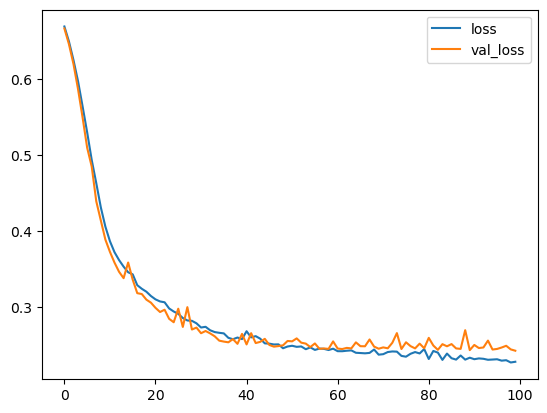

In [21]:
lossOfModel.plot()

In [22]:
# Predict for x_test
predictArray = (model.predict(x_test) > 0.5).astype("int32")

11/11 [==============================] - 0s 539us/step


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
predictArray[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [25]:
print(classification_report(y_test,predictArray))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       194
           1       0.87      0.90      0.88       136

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [26]:
# Comparison t_test and predicting data(predictArray) 
print(confusion_matrix(y_test,predictArray))

[[175  19]
 [ 13 123]]
